<img src="ggplot2.png" width="90"/> 

# **ggplot2**

## Introduction to ggplot2

[**ggplot2**](https://ggplot2.tidyverse.org/) is a powerful and a flexible R package for producing elegant graphics.

The concept behind ggplot2 divides plot into three different fundamental parts: 

**Plot = data + Aesthetics + Geometry**.

The principal components of every plot can be defined as follow:

* **data** is a data frame
* **Aesthetics** is used to indicate x and y variables. It can also be used to control the color, the size or the shape of points, the height of bars, etc.
* **Geometry** defines the type of graphics (histogram, box plot, line plot, density plot, dot plot)

## Data investigation

### Data Loading

In [1]:
# Load dplyr package
library(dplyr)

# Load ggplot package
library(ggplot2)

# Load the anytime package for handling date and time data
library(anytime)

# Read data from a CSV file into the 'billionaires' dataframe
billionaires <- read.csv('data/billionaires.csv')

# Load data from CSV file into the 'crimes' dataframe
crimes <- read.csv('data/us_crime_rates_1960_2014.csv')

# Load data from CSV file into the 'job' dataframe
job <- read.csv("data/salary.csv")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



ERROR: Error: package or namespace load failed for 'ggplot2' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 there is no package called 'scales'


[Billionaires Statistics Dataset (2023)](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset)

This dataset contains statistics on the world's billionaires, including information about their businesses, industries, and personal details. It provides insights into the wealth distribution, business sectors, and demographics of billionaires worldwide.

[US_Crime_Rates_1960_2014](https://www.kaggle.com/datasets/mahmoudshogaa/us-crime-rates-1960-2014)

The "1960_2014 Crimes Data" dataset contains information about reported crimes in US through the year 1960_2014. This dataset aims to provide insights into crime trends for analysis and predictive modeling. The data can be used for exploratory data analysis (EDA), trend identification, and forecasting future crime activities and rates. The dataset is particularly valuable for law enforcement agencies, researchers, and analysts interested in understanding crime dynamics.

[Salary by Job Title and Country](https://www.kaggle.com/datasets/amirmahdiabbootalebi/salary-by-job-title-and-country)

This dataset provides a comprehensive collection of salary information from various industries and regions across the globe. Sourced from reputable employment websites and surveys, it includes details on job titles, salaries, job sectors, geographic locations, and more. Analyze this data to gain insights into job market trends, compare compensation across different professions, and make informed decisions about your career or hiring strategies. The dataset is cleaned and preprocessed for ease of analysis and is available under an open license for research and data analysis purposes.

*Education Level:*

0 : High School

1 : Bachelor Degree

2 : Master Degree

3 : Phd

*Currency :* US Dollar

*Senior :* It shows that is this employee has a senior position or no.(Binary)

### General overview

In [ ]:
glimpse(crimes)

Observations: 55
Variables: 12
$ Year               <int> 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, ...
$ Population         <int> 179323175, 182992000, 185771000, 188483000, 1911...
$ Total              <int> 3384200, 3488000, 3752200, 4109500, 4564600, 473...
$ Violent            <int> 288460, 289390, 301510, 316970, 364220, 387390, ...
$ Property           <int> 3095700, 3198600, 3450700, 3792500, 4200400, 435...
$ Murder             <int> 9110, 8740, 8530, 8640, 9360, 9960, 11040, 12240...
$ Forcible_Rape      <int> 17190, 17220, 17550, 17650, 21420, 23410, 25820,...
$ Robbery            <int> 107840, 106670, 110860, 116470, 130390, 138690, ...
$ Aggravated_assault <int> 154320, 156760, 164570, 174210, 203050, 215330, ...
$ Burglary           <int> 912100, 949600, 994300, 1086400, 1213200, 128250...
$ Larceny_Theft      <int> 1855400, 1913000, 2089600, 2297800, 2514400, 257...
$ Vehicle_Theft      <int> 328200, 336000, 366800, 408300, 472800, 496900, ...


## Data Cleaning

In [ ]:
# Convert 'finalWorth' to billions
billionaires$finalWorth = billionaires$finalWorth /1000

# Convert character columns to character type
billionaires$personName <- as.character(billionaires$personName) 
billionaires$lastName <- as.character(billionaires$lastName) 
billionaires$firstName <- as.character(billionaires$firstName) 

# Convert date columns to proper date format using anytime package
billionaires$birthDate <- anytime::anydate(billionaires$birthDate)
billionaires$date <- anytime::anydate(billionaires$date)

## Line Chart

a graph that uses lines to connect individual data points. A line graph displays quantitative values over a specified time interval

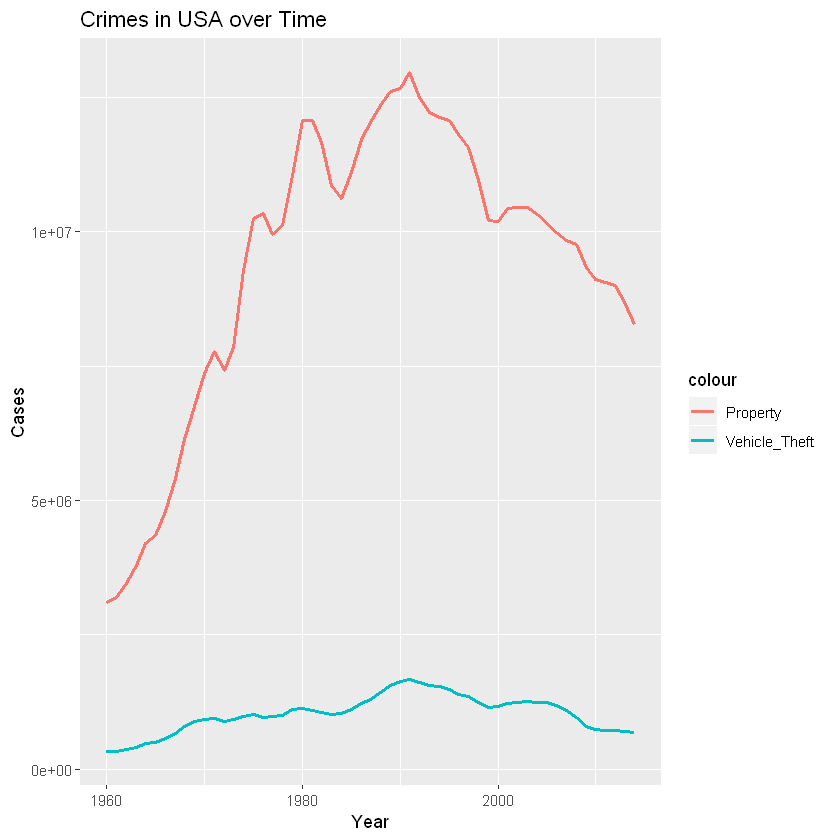

In [ ]:
ggplot(crimes, aes(x = Year)) +
  ggtitle('Crimes in USA over Time')+
  geom_line(aes(y = Property, color='Property'), size = 1) +
  geom_line(aes(y = Vehicle_Theft, color='Vehicle_Theft'), size = 1) +
  xlab("Year")+
  ylab("Cases")

## Bar chart

graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent

In [ ]:
# Calculate the count of billionaires for each country of citizenship and select the top 20
billionaires_count <- billionaires %>%
    count(countryOfCitizenship)%>%
    arrange(desc(n))%>%
    head(20)
billionaires_count

countryOfCitizenship n  
1  United States        735
2  China                491
3  India                169
4  Germany              126
5  Russia               104
6  Hong Kong             68
7  Italy                 64
8  Canada                63
9  Taiwan                52
10 United Kingdom        52
11 Brazil                51
12 Australia             47
13 France                43
14 Switzerland           41
15 Japan                 40
16 Sweden                39
17 Singapore             37
18 Israel                30
19 South Korea           30
20 Indonesia             29

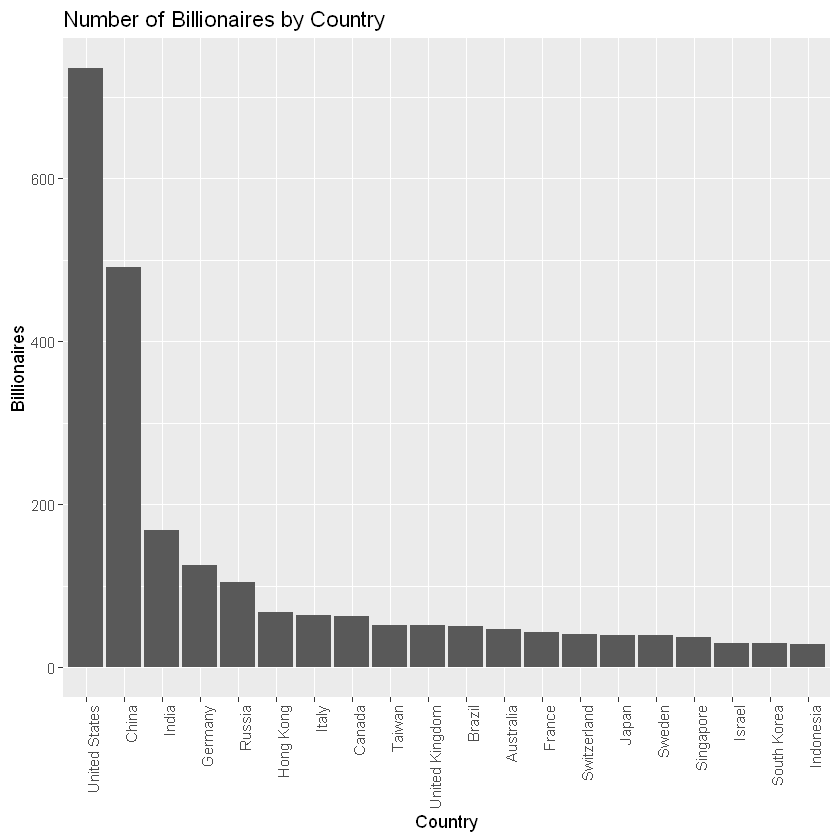

In [ ]:
ggplot(billionaires_count, aes(x = reorder(countryOfCitizenship, -n), y = n)) +
# Reorder the countries based on the descending order of their associated counts
  geom_bar(stat = "identity") +
  ggtitle("Number of Billionaires by Country") +
  xlab("Country") +
  ylab("Billionaires") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
  # Rotate x-axis labels for better readability

## Histogram

type of chart that shows the frequency distribution of data points across a continuous range of numerical values

Warning message:
"Removed 65 rows containing non-finite values (stat_bin)."

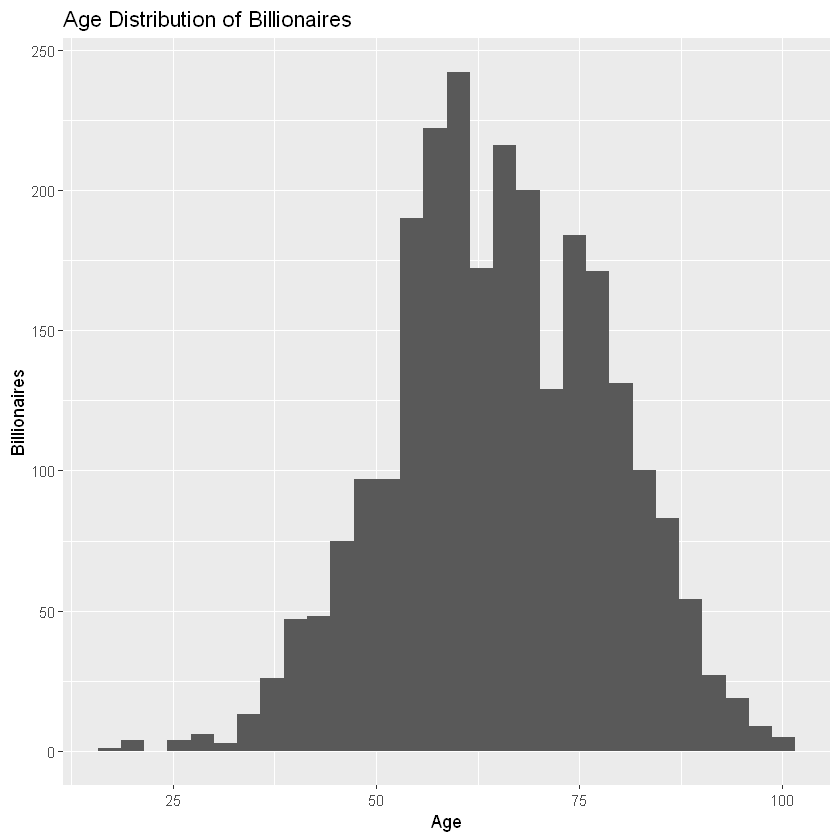

In [ ]:
ggplot(billionaires, aes(age))+
    geom_histogram(bins = 30)+
    ggtitle('Age Distribution of Billionaires') +
    xlab('Age') +
    ylab('Billionaires')

## Scatter Plot

used to examine the relationship between both the axes (X and Y) with one variable

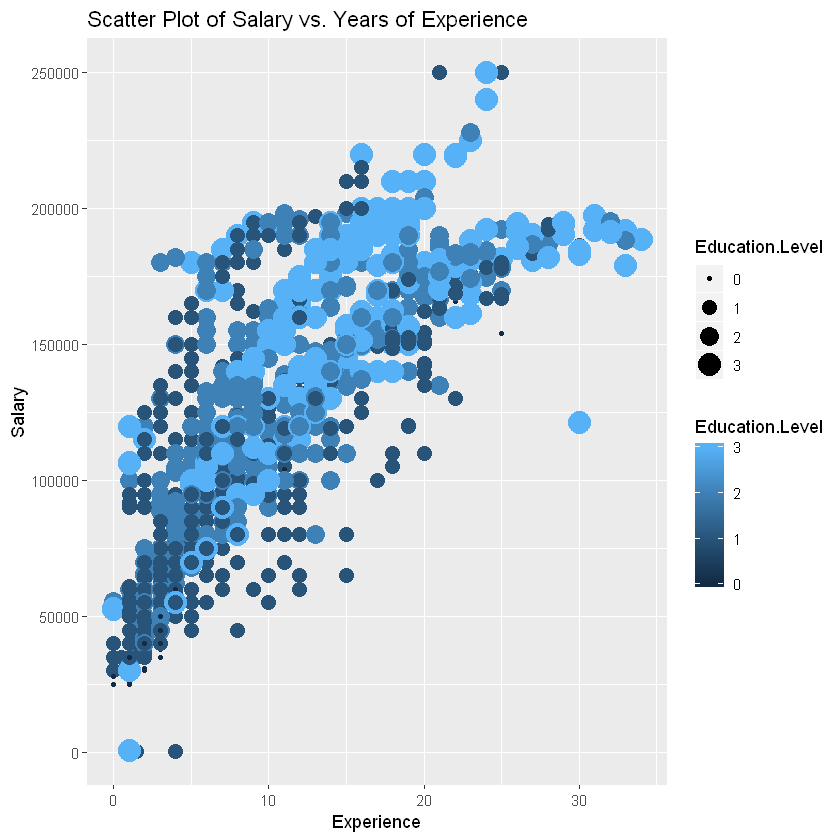

In [ ]:
ggplot(job, aes(Years.of.Experience, Salary)) +
  geom_point(aes(size=Education.Level, color=Education.Level)) +
  ggtitle('Scatter Plot of Salary vs. Years of Experience') +
  xlab('Experience') +
  ylab('Salary')

## Boxplot

uses boxes and lines to depict the distributions of one or more groups of numeric data. Box limits indicate the range of the central 50% of the data, with a central line marking the median value. Lines extend from each box to capture the range of the remaining data, with dots placed past the line edges to indicate outliers

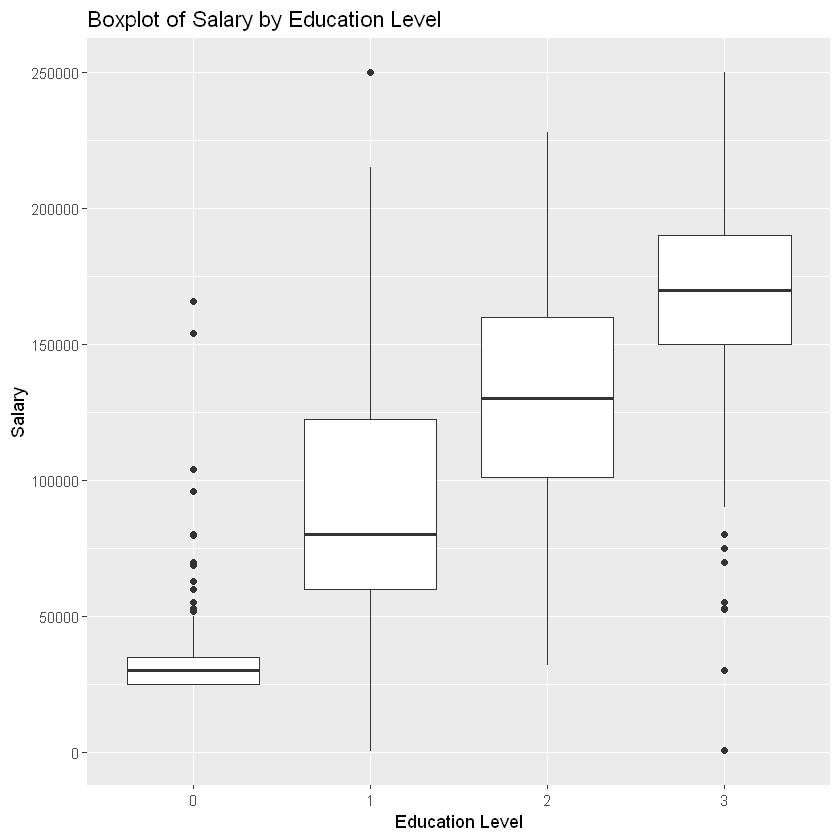

In [ ]:
ggplot(job, aes(factor(Education.Level), Salary)) +
  geom_boxplot() +
  ggtitle('Boxplot of Salary by Education Level') +
  xlab('Education Level') +
  ylab('Salary')

## Pie Chart

type of graph representing data in a circular form, with each slice of the circle representing a fraction or proportionate part of the whole

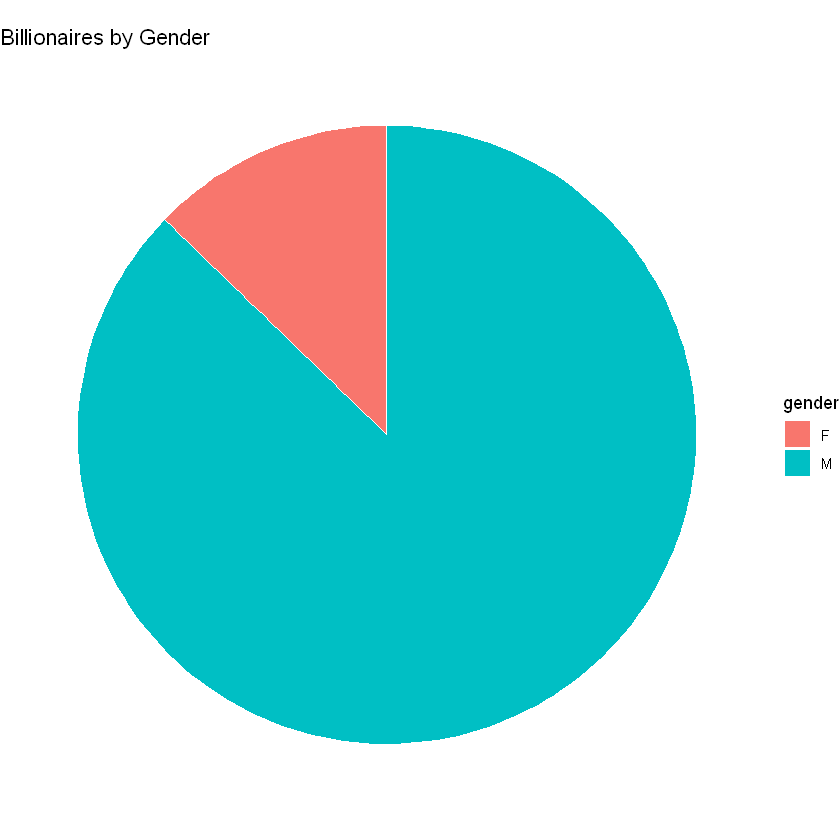

In [ ]:
ggplot(billionaires, aes(x = "", fill = gender)) + 
  geom_bar(width = 1, color = "white", stat = "count") +  
  coord_polar("y") + 
  labs(title = "Billionaires by Gender") + 
  theme_void()